<a href="https://colab.research.google.com/github/JanghyukChoi/ML-Deeplearning-Basic/blob/main/Deep%20Learning/Deel_learning_Artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07-1 인공 신경망

패션 분야 오픈 이벤트도 역시 럭키백 이벤트 형식으로 진행한다.

In [ ]:
from tensorflow import keras
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


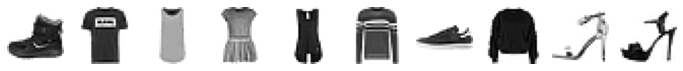

In [ ]:
#어떤 이미지인지 직접 보는 것이 문제를 이해하는데 큰 도움이 된다
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(12,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
#각 샘플이 몇 개 들어있는지 확인해보기
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28) #1차원으로 변경해주는 것이다
print(train_scaled.shape)

(60000, 784)


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [ ]:
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model = keras.Sequential(dense) #신경망 모델 만들기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6136 - accuracy: 0.7911
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4793 - accuracy: 0.8378
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4563 - accuracy: 0.8476
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4436 - accuracy: 0.8532
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4368 - accuracy: 0.8552


In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.8478


[0.4531371295452118, 0.8477500081062317]

##2개의 층

다시 케라스 API를 사용해서 패션 MNIST 데이터셋을 불러온다.

In [ ]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28) #1차원으로 변경해주는 것이다
from tensorflow import keras
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

##활성화 함수 (Activation Function)

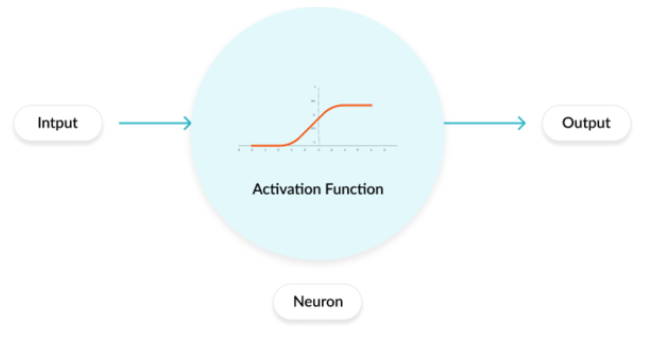

입력된 데이터의 가중 합을 출력 신호로 변환하는 함수.

인공 신경망에서는 이전 레이어에 대한 가중 합의 크기에 따라 활성 여부가 결정됨.
신경망 층의 선형 방정식의 계산 값에 적용하는 비선형 함수.

선형 함수 사용시 층을 깊게 하는 의미가 줄어들기에 비선형 함수 사용.
활성화 함수도 선택해야 할 하이퍼파라미터 중 하나.

01. 출력 층의 활성화 함수


이진 분류 👉 시그모이드 함수

다중 분류 👉 소프트맥스 함수



02. 은닉 층의 활성화 함수


시그모이드 함수

볼 렐루(ReLU) 함수



In [ ]:
#시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들어 보겠다.
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5657 - accuracy: 0.8091
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4089 - accuracy: 0.8518
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8658
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3507 - accuracy: 0.8730
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3335 - accuracy: 0.8792


In [ ]:
#시그모이드 함수의 개선 함수인 relu 적용하기
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5372 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3952 - accuracy: 0.8568
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3544 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8789
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.8858


1절의 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상되었다. 지금까지는 모델을 5번의 에포크 동안 훈련했다.

지금까지 다룬 하이퍼파라미터는 추가할 은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수 등이 있다.

In [ ]:
#옵티마이저를 추가해서 다시 모델을 훈련해보자
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)
model.evaluate(val_scaled,val_target)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5261 - accuracy: 0.8145
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3943 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3494 - accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3238 - accuracy: 0.8814
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8769


[0.34305697679519653, 0.8769166469573975]

현재 가장 많이 사용하는 옵티마이저는 Adam이다. 활성화 함수(Activation Function)로 Relu를 가장 많이 활용하는 것처럼 Adam이 빠르기도 하면서 성능도 좋고 무난하다. 하지만 다른 옵티마이저를 무조건 쓰지 말라는 법은 없다. 프로젝트와 데이터 별로 미묘하게 다른 옵티마이저가 더 좋을수도 있고 혹은 학습 속도의 문제등으로 약간의 성능을 포기할 수 있다.
가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD다.

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


정리: 여러 개의 층을 추가하여 다층 인공 신경망을 만드는 방법을 터득했습니다. 은닉층에 적용한 시그모이드 활성화 함수 대신 새로운 렐루 활성화 함수에 대해 배웠고 다양한 옵티마이저들을 적용하는 방법도 배웠다.

##07-3 신경망 모델 훈련

인공 신경망 모델을 훈련하는 모범 사례와 필요한 도구들을 살펴본다.

손실 곡선 만들기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled , val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,test_size=0.2,random_state=42)

#모델을 만드는 간단한 함수를 정의한다
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

model = model_fn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


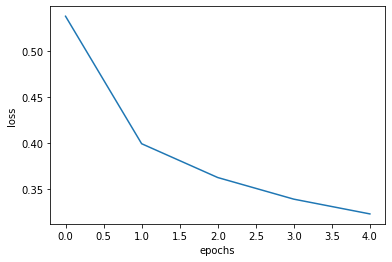

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
#기본적으로 에포크마다  손실을 계산한다. 정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되었다.
history = model.fit(train_scaled,train_target,epochs=5,verbose=0)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


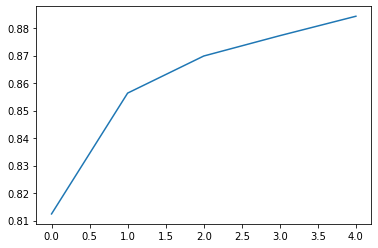

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수다. 검증 손실을 계산하기 위해서는 fit() 메서드로 확인한다.

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

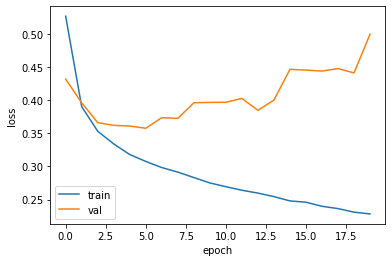

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 알아보겠다.

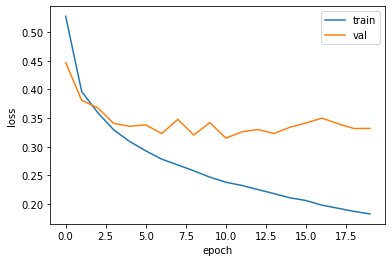

In [ ]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

더 나은 손실곡선을 만들기 위해서는 학습률을 조정해야된다. 한번 도전해보자!

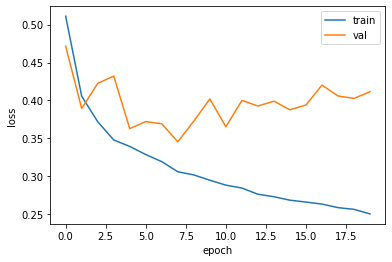

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.005)
model = model_fn()
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###드롭 아웃

드롭 아웃은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다. 어떤 샘플을 처리할 때는 은닉층의 두번째 뉴런이 드롭아웃 되어 h2 출력이 없다. ....

30% 정도를 드롭아웃 해보자

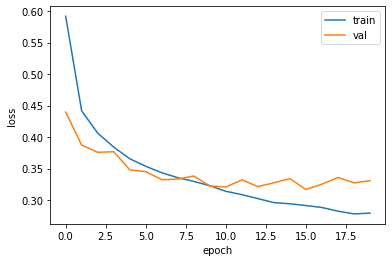

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))

In [ ]:
model.save_weights('model-weights.h5')
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

이제 이 모델의 검증 정확도를 확인해보자. 케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다. 따라서 조금 번거롭지만 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교해서 정홧도를 계산해보자.

ps. 왜 evaluate() 메서드를 사용하지 않는가?

해당 메서드를 사용하려면 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행해야 한다.

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

0.881


모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용했다. 이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다.

그런데 이 과정을 돌이켜 보면 20번의 에포크 동안 모델을 훈련해 검증 점수가 상승하는 지점을 확인했다. 그 다음 모델을 과대적합 되지 않는 에포크만큼 다시 훈련했다. 한번에 못할까?


In [ ]:
#콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.8837


[0.31586959958076477, 0.8836666941642761]

In [ ]:
#조기 종료
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3270 - accuracy: 0.8822


[0.326968252658844, 0.8821666836738586]

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


##08-1 합성곱 신경망의 구성 요소 (Convolutional neural network, CNN)

합성곱 신경망을 구성하는 기본 개념과 동작 원리를 배우고 간단한 합성곱.

합성곱은 마치 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래까지 이동하면서 출력을 만든다.
예를들어 2차원 배열이면 필터(도장)도 2차원이어야하며, 출력되는 값도 2차원으로 나온다. 합성곱 층에서도 여러 개의 필터를 사용한다. 합성곱은 2차원 구조를 그대로 사용하기 때문에 이미지 처리 분야에서 뛰어난 성능을 발휘한다.  

용어 정리

**-필터: 내 데이터에 찍는 도장**

**-커널: 내 데이터에 곱해지는 가중치 (w1,w2,w3...)**

**-특성 맵: 합성곱 계산을 통해 얻은 출력값**

### 패딩과 스트라이드

(4,4) <- (3,3) = (4,4) 가 되는 방법은 없을까?

더 큰 입력에 합성곱하는 척하면 된다. (4,4) 대신 (6,6)인 척을 하는 것이다. 우리는 이런걸 패딩이라고 한다. 실제 입력값이 아니기 때문에 패딩은 0으로 채운다. 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것 밖에 없다. 이처럼 입력과 특성맵의 크기를 동일하게 만드는 것을 Same Padding이라고 한다. 또한 도장이 한칸 말고 두칸씩 이동할 수도 있다. 하지만 정말 드물다. 움직이는 크기는 스트라이드라고 한다.

In [ ]:
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',strides=1)


###풀링

풀링은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 하지만 특성맵의 갯수는 줄이지 않는다. 풀링에서는 데이터의 겹치는 부분 없이 이동한다. 따라서 풀링의 크기가 (2,2)이면 가로세로 두 칸씩 이동한다. 만약 (3,3)이면 가로세로 3칸씩 이동한다. 풀링을 사용하는 이유는 합성곱에서 스트라이드를 크게하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문이다.

###합성곱 신경망의 전체 구조

입력층 -> 합성곱 층 (세임 패딩) -> 풀링층 -> 밀집층

###컬러 이미지를 사용한 합성곱

이렇게 합성곱 신경망은 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 것이 특징이다. 그리고 마지막에 출력층 전에 특성 맵을 모두 펼쳐서 밀집층의 입력으로 사용한다.  

##08-2 합성곱 신경망을 사용한 이미지 분류



In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target  = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [ ]:
#합성곱 층(1) 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
#풀링 층(1) 만들기
model.add(keras.layers.MaxPooling2D(2)) #최대 풀링을 통과한 특성 맵의 크기는 14,14,32가 될 것이다
#합성곱 층(2) 만들기
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
#풀링 층(2) 만들기
model.add(keras.layers.MaxPooling2D(2)) #결국 최종 특성 맵의 크기는 (7,7,64)
#은닉층 하나 만들기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
#Dense 출력층 마지막으로 만들기
model.add(keras.layers.Dense(10,activation='softmax'))

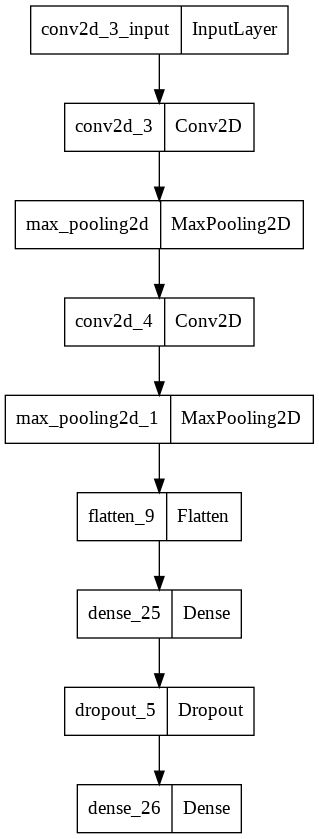

In [ ]:
#층의 구성을 그림으로 표현하기
keras.utils.plot_model(model)

Adam 옵티마이저를 사용하고 ModelCheckPoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법을 구현한다.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 18s 7ms/step - loss: 0.5366 - accuracy: 0.8100 - val_loss: 0.3384 - val_accuracy: 0.8748
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3495 - accuracy: 0.8753 - val_loss: 0.2793 - val_accuracy: 0.8969
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2996 - accuracy: 0.8924 - val_loss: 0.2676 - val_accuracy: 0.9038
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2666 - accuracy: 0.9030 - val_loss: 0.2629 - val_accuracy: 0.9029
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2456 - accuracy: 0.9094 - val_loss: 0.2365 - val_accuracy: 0.9124
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2288 - accuracy: 0.9156 - val_loss: 0.2299 - val_accuracy: 0.9173
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2138 - accuracy: 0.9222 - val_loss: 0.2326 - val_ac

predict() 메서드를 사용해서 훈련된 모델을 사용해 새로운 데이터에 대해 예측을 만들어보자. 여기에서는 편의상 검증 세트의 첫 번째 샘플을 처음 본 이미지라고 가정한다.

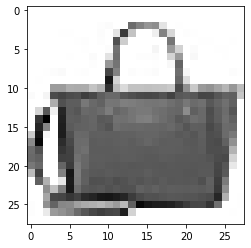

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [ ]:
#샘플 데이터 하나를 선택해 예측 클래스를 출력하는 방법
preds = model.predict(val_scaled[0:1])
print(preds)
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

[[1.8567678e-19 3.2073896e-25 2.0495283e-22 2.0762890e-17 9.5686928e-20
  1.0030385e-20 3.6389265e-19 6.9242597e-24 1.0000000e+00 4.1537432e-25]]
가방


마지막으로 맨 처음에 떼어 놓았던 테스트 세트로 합성곱 신경망의 일반화 성능을 가늠해 본다.

In [ ]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2411 - accuracy: 0.9140


[0.24111586809158325, 0.9139999747276306]

결과: 결국 우리는 7장에서 배운 인공 신경망 모델에서 조금 더 발전한 CNN을 배우게 되었다. 정확도 88% 에서 91.19% 로 상승했다.

## 08-3 합성곱 신경망의 시각화



In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
#층의 가중치와 절편은 층의 weights 속성에 저장되어 있다ㅏ.
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.04672157 0.2824649


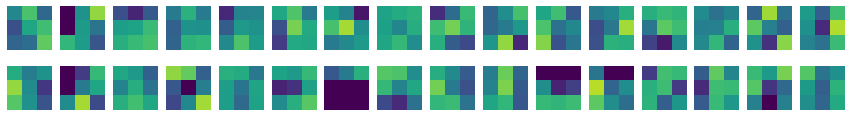

In [ ]:
#32개의 커널을 16개씩 두 줄에 출력해본다
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
#훈련하지 않은 빈 합성곱 신경망을 만들어 보자
from tensorflow import keras
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) #합성곱층
no_training_conv = no_training_model.layers[0]
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


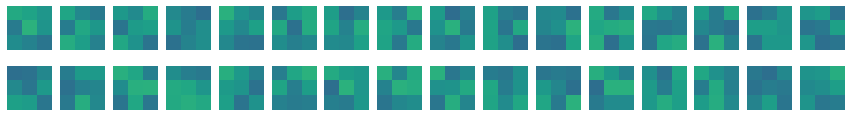

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

##특성 맵 시각화

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
conv_acti = keras.Model(model.input,model.layers[0].output)
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)
